<a href="https://colab.research.google.com/github/alireza7822/Pneumonia-Transfer-Learning-Deep-Learning-Model/blob/main/Pneumonia_X_ray_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pneumonia CHest X-Ray Detector

### When using in Google Colab, mounts Google Drive to access the data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd '/content/drive/My Drive/COVID_Chest_X_Ray_Data/COVID19-Data'

In [ ]:
from google.colab import files
Pneumonia = files.upload()
Normal = files.upload()

Saving G_PC.zip to G_PC.zip


Saving G_NC.zip to G_NC.zip


In [ ]:
!unzip -q "/content/G_NC.zip"

In [ ]:
!unzip -q "/content/G_PC.zip"

### Importing all dependencies and libraries

In [ ]:
from __future__ import print_function, division
from builtins import range, input
import tensorflow as tf

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model

from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import StratifiedKFold

from glob import glob
import pandas as pd

### Defines some model parameters

In [ ]:
#define size to which images are to be resized
IMAGE_SIZE = [224, 224] # can be changed depending on the dataset

# training config:
epochs = 250
batch_size = 32

# define paths
# Pneumonia_path = '/content/drive/My Drive/COVID_Chest_X_Ray_Data/Chest_COVID'
# Normal_path = '/content/drive/My Drive/COVID_Chest_X_Ray_Data/Chest_NonCOVID'
Pneumonia_path = '/content/G2'
Normal_path = '/content/G1'
# Use glob to grab images from path .jpg or jpeg
Pneumonia_files = glob(Pneumonia_path + '/*')
Normal_files = glob(Normal_path + '/*')

In [ ]:
# Data size for both of the labels

print(len(Pneumonia_files), len(Normal_files))

4758 16537


In [ ]:
# Preparing Labels
Pneumonia_labels = []
Normal_labels = []

Pneumonia_images=[]
Normal_images=[]

import cv2 

for i in range(500):
  image = cv2.imread(Pneumonia_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  Pneumonia_images.append(image )
  Pneumonia_labels.append('Chest_Pneumonia')
  
for i in range(500):
  image = cv2.imread(Normal_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  Normal_images.append(image )
  Normal_labels.append('Chest_Normal')




In [ ]:
# # Preparing Labels
# Pneumonia_labels = []
# Normal_labels = []

# Pneumonia_images=[]
# Normal_images=[]

# import cv2 

# for i in range(len(Pneumonia_files)):
#   image = cv2.imread(Pneumonia_files[i])
#   image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#   image = cv2.resize(image,(224,224))
#   Pneumonia_images.append(image)
#   Pneumonia_labels.append('Chest_Pneumonia')
  
# for i in range(len(Normal_files)):
#   image = cv2.imread(noncovid_files[i])
#   image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#   image = cv2.resize(image,(224,224))
#   Normal_images.append(image)
#   Normal_labels.append('Chest_NonCOVID')

### Quick glimpse of the data set

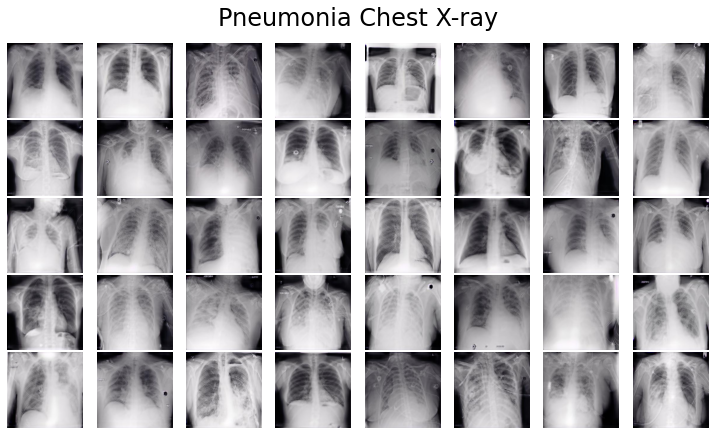

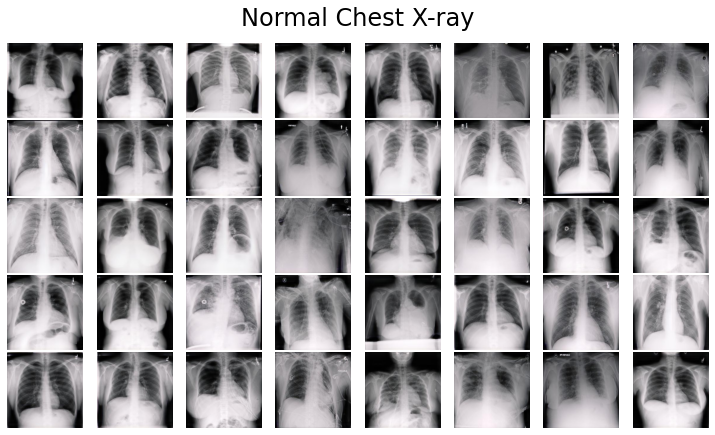

In [ ]:
# look at a random image for fun
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
plot_images(Pneumonia_images, 'Pneumonia Chest X-ray')
plot_images(Normal_images, 'Normal Chest X-ray')

In [ ]:
# Convert to array and Normalize to interval of [0,1]
Pneumonia_images = np.array(Pneumonia_images) / 255


In [ ]:
# np.save('covid_images', covid_images)

In [ ]:
len(Normal_images)

500

In [ ]:
# covid_images  = np.load("/content/covid_images.npy")

In [ ]:
Normal_images = np.array(Normal_images) / 255

### Split data set into training and testing

In [ ]:
from sklearn.model_selection import KFold
inputs = np.concatenate((Pneumonia_images, Normal_images), axis=0)
targets = np.concatenate((Pneumonia_labels, Normal_labels), axis=0)

In [ ]:
targets = LabelBinarizer().fit_transform(targets)
targets = to_categorical(targets)


In [ ]:
# split into training and testing
Pneumonia_x_train, Pneumonia_x_test, Pneumonia_y_train, Pneumonia_y_test = train_test_split(Pneumonia_images, Pneumonia_labels, test_size=0.2)
Normal_x_train, Normal_x_test, Normal_y_train, Normal_y_test = train_test_split(Normal_images, Normal_labels, test_size=0.2)


X_train = np.concatenate((Normal_x_train, Pneumonia_x_train), axis=0)
X_test = np.concatenate((Normal_x_test, Pneumonia_x_test), axis=0)
y_train = np.concatenate((Normal_y_train, Pneumonia_y_train), axis=0)
y_test = np.concatenate((Normal_y_test, Pneumonia_y_test), axis=0)

# make labels into categories - either 0 or 1
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

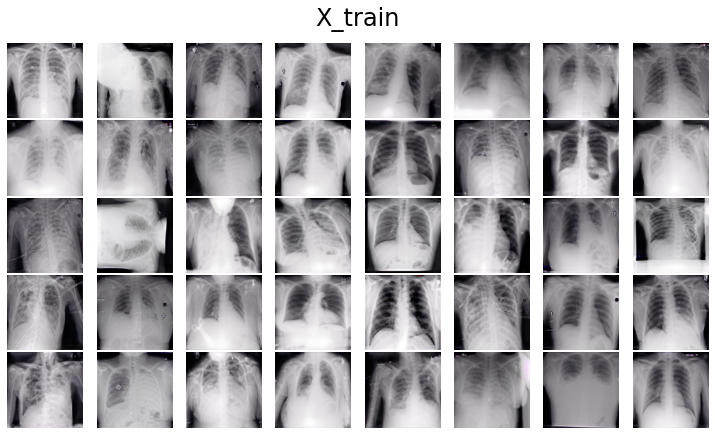

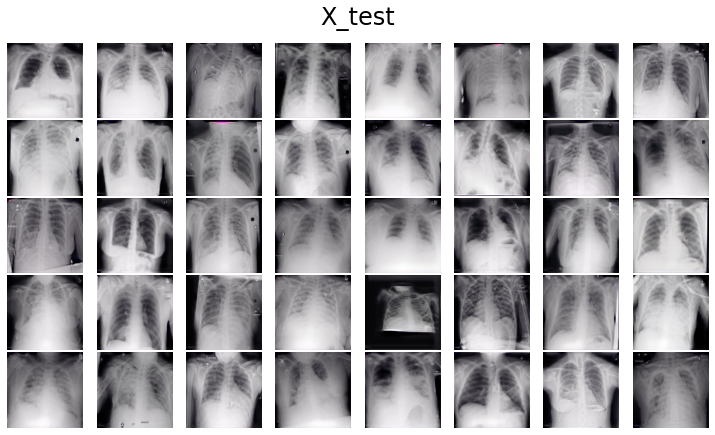

In [ ]:
plot_images(Pneumonia_x_train, 'X_train')
plot_images(Pneumonia_x_test, 'X_test')
# y_train and y_test contain class lables 0 and 1 representing COVID and NonCOVID for X_train and X_test

In [ ]:
train_augmented = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
def plot_confusion_matrix(normalize):
    classes = ['Pneumonia','Normal']
    tick_marks = [0.5,1.5]
    cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
    sns.heatmap(cn,cmap='plasma',annot=True)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


### Importing the Model

In [ ]:
XceptionModel = Xception(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = XceptionModel.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model = Model(inputs=XceptionModel.input, outputs=outputs)

for layer in XceptionModel.layers:
    layer.trainable = False

model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

### Training!

In [ ]:
history = model.fit(train_augmented.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / 32,
                    steps_per_epoch=len(X_train) / 32,
                    epochs=250)

Epoch 1/250
25/25 [==============================] - 28s 607ms/step - loss: 2.3996 - accuracy: 0.6400 - val_loss: 1.5938 - val_accuracy: 0.6900
Epoch 2/250
25/25 [==============================] - 13s 528ms/step - loss: 0.7658 - accuracy: 0.8012 - val_loss: 0.8988 - val_accuracy: 0.7850
Epoch 3/250
25/25 [==============================] - 13s 527ms/step - loss: 0.4832 - accuracy: 0.8763 - val_loss: 0.7026 - val_accuracy: 0.8150
Epoch 4/250
25/25 [==============================] - 13s 532ms/step - loss: 0.4361 - accuracy: 0.8788 - val_loss: 0.6026 - val_accuracy: 0.8300
Epoch 5/250
25/25 [==============================] - 13s 531ms/step - loss: 0.4702 - accuracy: 0.8750 - val_loss: 0.8277 - val_accuracy: 0.8200
Epoch 6/250
25/25 [==============================] - 13s 530ms/step - loss: 0.3587 - accuracy: 0.8825 - val_loss: 0.8540 - val_accuracy: 0.8250
Epoch 7/250
25/25 [==============================] - 13s 531ms/step - loss: 0.4111 - accuracy: 0.8825 - val_loss: 1.2730 - val_accuracy:

### Model export

In [ ]:
model.save('/content/Xception_chest.h5')

In [ ]:
model.save_weights('/content/Pneumonia_Xception_chest_weights.hdf5')

In [ ]:
model = load_model('/content/Xception_chest.h5')

### Results and analysis

In [ ]:
y_pred = model.predict(X_test, batch_size=batch_size)

In [ ]:
y_pred[0:10]

array([[1.0000000e+00, 1.2499316e-12],
       [1.0000000e+00, 3.7580211e-19],
       [1.0000000e+00, 3.8050197e-33],
       [1.0000000e+00, 6.2493046e-22],
       [1.0000000e+00, 1.3549463e-20],
       [1.0000000e+00, 2.4939631e-35],
       [9.9998987e-01, 1.0091008e-05],
       [1.0000000e+00, 1.3892998e-38],
       [1.0000000e+00, 1.3657893e-09],
       [1.0000000e+00, 2.3260508e-33]], dtype=float32)

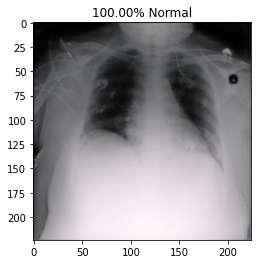

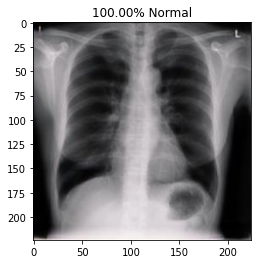

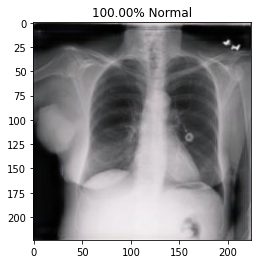

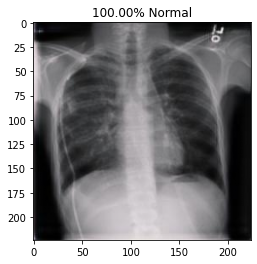

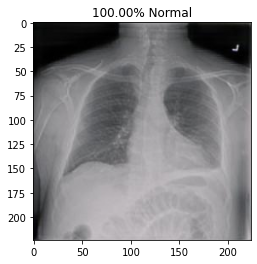

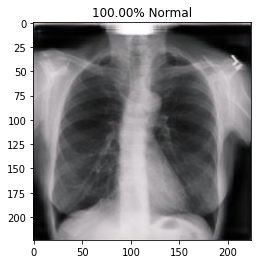

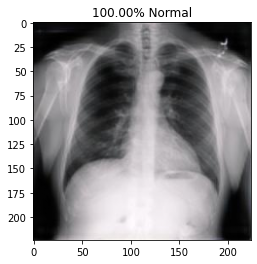

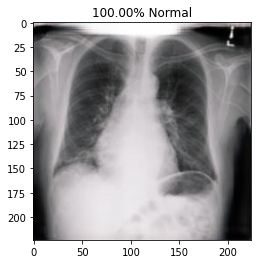

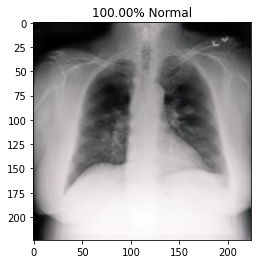

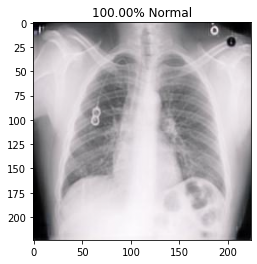

In [ ]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
    if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% Pneumonia')
    else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% Normal')
    plt.imshow(X_test[index])
    plt.show()

In [ ]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

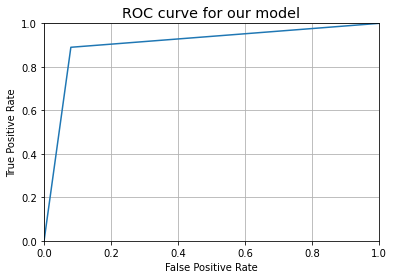

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

Confusion Matrix without Normalization


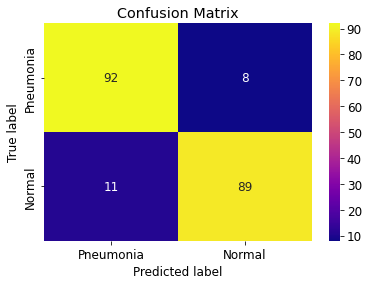

Confusion Matrix with Normalized Values


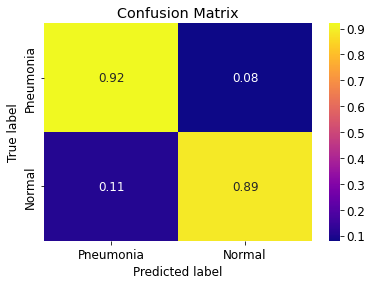

In [ ]:
print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [ ]:
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       100
           1       0.92      0.89      0.90       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200



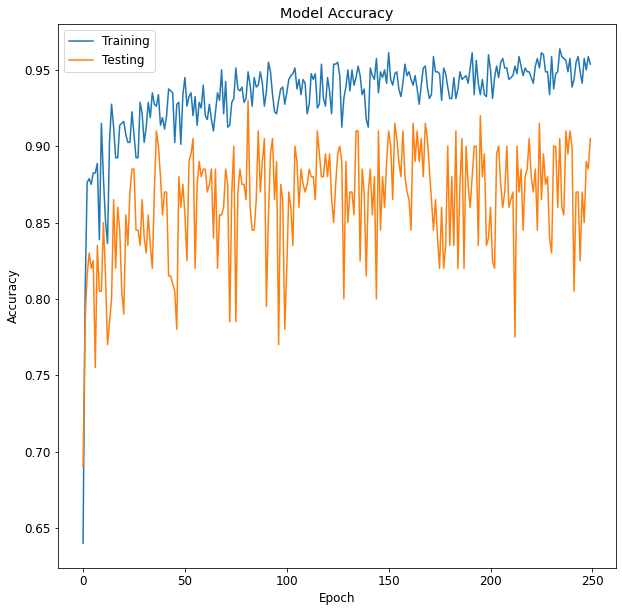

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('XceptionModel_chest_accuracy.png')
plt.show()

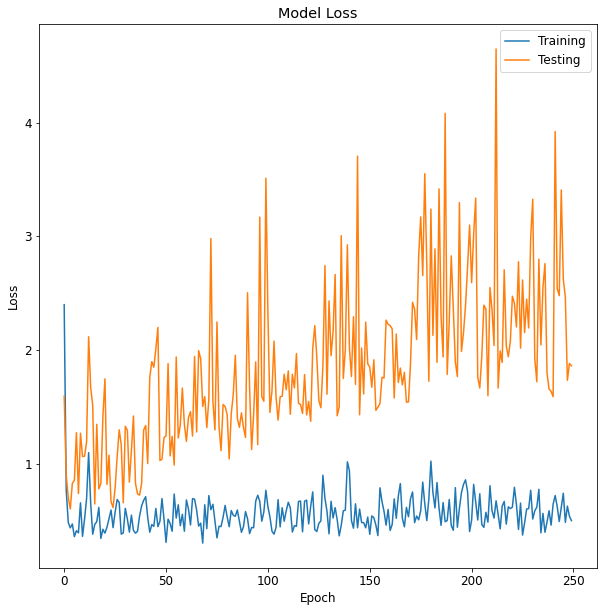

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('XceptionModel_chest_loss.png')
plt.show()

#5- fold

In [ ]:
fold_no = 1
batch_size = 5
epochs = 25

acc_per_fold = []
perf_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

for train, test in kfold.split(inputs, targets):
    
    #Create Model
  XceptionModel = Xception(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

  outputs = XceptionModel.output
  outputs = Flatten(name="flatten")(outputs)
  outputs = Dropout(0.5)(outputs)
  outputs = Dense(2, activation="softmax")(outputs)

  model_Xception_kfold = Model(inputs=XceptionModel.input, outputs=outputs)

  for layer in XceptionModel.layers:
    layer.trainable = False

  model_Xception_kfold.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
  )
    
 
  history = model_Xception_kfold.fit(train_augmented.flow(inputs[train], targets[train], batch_size=32),
                    validation_data=(inputs[test], targets[test]),
                    validation_steps=len(inputs[test]) / 32,
                    steps_per_epoch=len(inputs[train]) / 32,
                    epochs=250)
  y_pred = model_Xception_kfold.predict(inputs[test], batch_size=batch_size)
  prediction=y_pred[0:10]
  for index, probability in enumerate(prediction):
    if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% Pneumonia')
    else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% Normal')
    plt.imshow(inputs[test][index])
    plt.show()
  # Convert to Binary classes
  y_pred_bin = np.argmax(y_pred, axis=1)
  y_test_bin = np.argmax(targets[test], axis=1)
  
  
  fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
  plt.plot(fpr, tpr)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.rcParams['font.size'] = 12
  plt.title('ROC curve for our model')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.grid(True)


  

  print('Confusion Matrix without Normalization')
  plot_confusion_matrix(normalize=None)

  print('Confusion Matrix with Normalized Values')
  plot_confusion_matrix(normalize='true')


  print(classification_report(y_test_bin, y_pred_bin))

 
  
  

#EfficientNetB0

import model

In [ ]:
EfficientNetB0Model = EfficientNetB0(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = EfficientNetB0Model.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model_EfficientNetB0 = Model(inputs=EfficientNetB0Model.input, outputs=outputs)

for layer in EfficientNetB0Model.layers:
    layer.trainable = False

model_EfficientNetB0.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
model_EfficientNetB0.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

Training

In [ ]:
history = model_EfficientNetB0.fit(train_augmented.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / 32,
                    steps_per_epoch=len(X_train) / 32,
                    epochs=250)

Epoch 1/250
25/25 [==============================] - 39s 560ms/step - loss: 4.0763 - accuracy: 0.4988 - val_loss: 1.8556 - val_accuracy: 0.5000
Epoch 2/250
25/25 [==============================] - 11s 420ms/step - loss: 1.2565 - accuracy: 0.5125 - val_loss: 0.7401 - val_accuracy: 0.5000
Epoch 3/250
25/25 [==============================] - 11s 447ms/step - loss: 1.0286 - accuracy: 0.5075 - val_loss: 0.9357 - val_accuracy: 0.5000
Epoch 4/250
25/25 [==============================] - 11s 424ms/step - loss: 0.9570 - accuracy: 0.5138 - val_loss: 1.2263 - val_accuracy: 0.5000
Epoch 5/250
25/25 [==============================] - 11s 445ms/step - loss: 1.2870 - accuracy: 0.4975 - val_loss: 0.8543 - val_accuracy: 0.5000
Epoch 6/250
25/25 [==============================] - 11s 423ms/step - loss: 1.1383 - accuracy: 0.4963 - val_loss: 1.3421 - val_accuracy: 0.5000
Epoch 7/250
25/25 [==============================] - 11s 422ms/step - loss: 1.2471 - accuracy: 0.4837 - val_loss: 1.1751 - val_accuracy:

In [ ]:
model_EfficientNetB0.save('/content/EfficientNetB0_chest.h5')

In [ ]:
model_EfficientNetB0.save_weights('/content/EfficientNetB0_chest_weights.hdf5')

In [ ]:
model_EfficientNetB0 = load_model('/content/EfficientNetB0_chest.h5')

Results and analysis

In [ ]:
y_pred = model_EfficientNetB0.predict(X_test, batch_size=batch_size)

In [ ]:
y_pred[0:10]

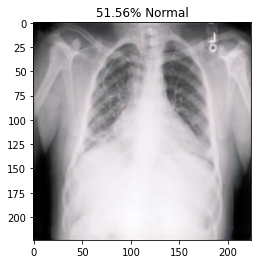

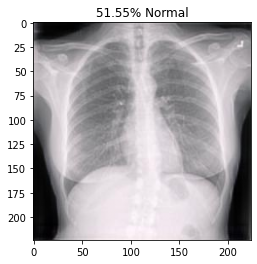

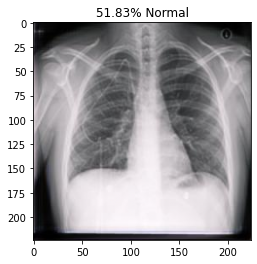

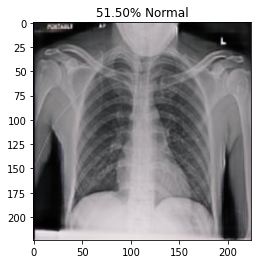

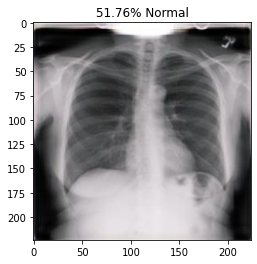

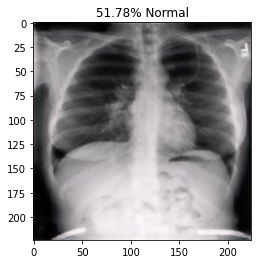

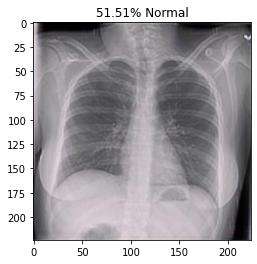

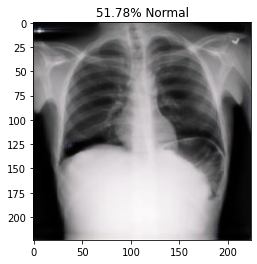

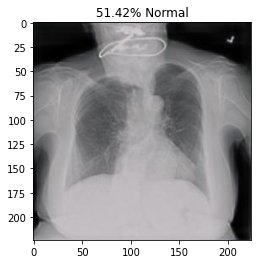

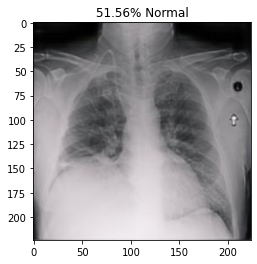

In [ ]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
    if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% Pneumonia')
    else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% Normal')
    plt.imshow(X_test[index])
    plt.show()

In [ ]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

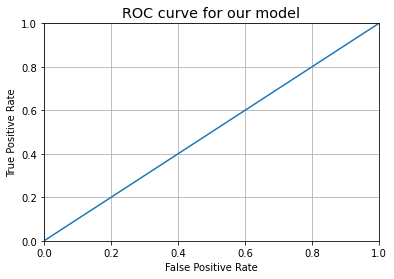

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

Confusion Matrix without Normalization


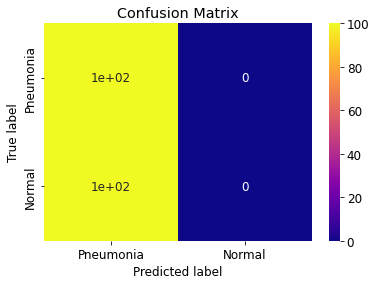

Confusion Matrix with Normalized Values


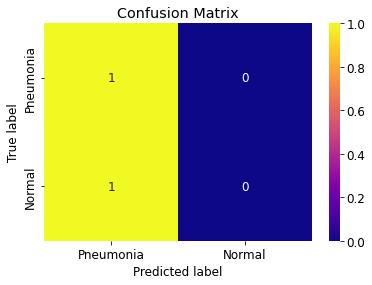

In [ ]:
print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [ ]:
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       100
           1       0.00      0.00      0.00       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


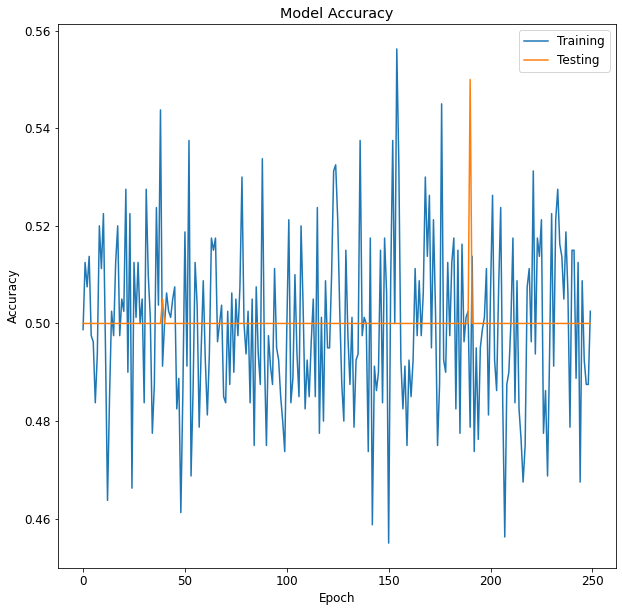

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('EfficientNetB0_chest_accuracy.png')
plt.show()

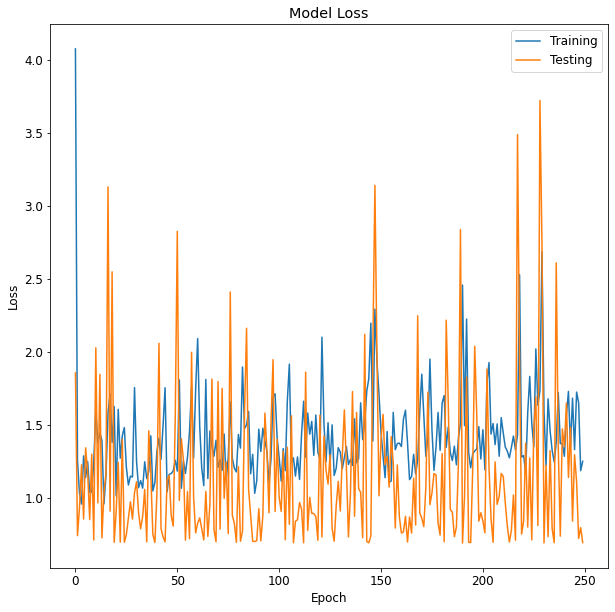

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('EfficientNetB0_chest_loss.png')
plt.show()

5-fold

In [ ]:
fold_no = 1
batch_size = 5
epochs = 25

acc_per_fold = []
perf_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

for train, test in kfold.split(inputs, targets):
    
  EfficientNetB0Model = EfficientNetB0(weights="imagenet", include_top=False,
  input_tensor=Input(shape=(224, 224, 3)))

  outputs = EfficientNetB0Model.output
  outputs = Flatten(name="flatten")(outputs)
  outputs = Dropout(0.5)(outputs)
  outputs = Dense(2, activation="softmax")(outputs)

  model_EfficientNetB0_kfold = Model(inputs=EfficientNetB0Model.input, outputs=outputs)

  for layer in EfficientNetB0Model.layers:
      layer.trainable = False


  model_EfficientNetB0_kfold.compile(
            loss='categorical_crossentropy', 
            optimizer='adam', 
            metrics=['accuracy']
  )
  
  history = model_EfficientNetB0_kfold.fit(train_augmented.flow(inputs[train], targets[train], batch_size=32),
                    validation_data=(inputs[test], targets[test]),
                    validation_steps=len(inputs[test]) / 32,
                    steps_per_epoch=len(inputs[train]) / 32,
                    epochs=250)
  y_pred = model_EfficientNetB0_kfold.predict(inputs[test], batch_size=batch_size)
  prediction=y_pred[0:10]
  for index, probability in enumerate(prediction):
    if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% Pneumonia')
    else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% Normal')
    plt.imshow(inputs[test][index])
    plt.show()
  # Convert to Binary classes
  y_pred_bin = np.argmax(y_pred, axis=1)
  y_test_bin = np.argmax(targets[test], axis=1)
  
  
  fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
  plt.plot(fpr, tpr)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.rcParams['font.size'] = 12
  plt.title('ROC curve for our model')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.grid(True)


  

  print('Confusion Matrix without Normalization')
  plot_confusion_matrix(normalize=None)

  print('Confusion Matrix with Normalized Values')
  plot_confusion_matrix(normalize='true')


  print(classification_report(y_test_bin, y_pred_bin))

In [ ]:
NASNetLargeB0Model = NASNetLarge(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = NASNetLargeModel.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

NASNetLarge_model = Model(inputs= NASNetLargeModel.input, outputs=outputs)

for layer in NASNetLargeModel.layers:
    layer.trainable = False

NASNetLarge_model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

In [ ]:
NASNetLarge_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 111, 111, 96  2592        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 111, 111, 96  384         ['stem_conv1[0][0]']             
                                )                                                           

In [ ]:
history = NASNetLarge_model.fit(train_augmented.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / 32,
                    steps_per_epoch=len(X_train) / 32,
                    epochs=250)

Epoch 1/250
25/25 [==============================] - 67s 1s/step - loss: 2.9859 - accuracy: 0.6475 - val_loss: 2.1254 - val_accuracy: 0.7450
Epoch 2/250
25/25 [==============================] - 29s 1s/step - loss: 2.2406 - accuracy: 0.7875 - val_loss: 1.1742 - val_accuracy: 0.7950
Epoch 3/250
25/25 [==============================] - 29s 1s/step - loss: 1.5783 - accuracy: 0.8188 - val_loss: 0.9351 - val_accuracy: 0.8650
Epoch 4/250
25/25 [==============================] - 29s 1s/step - loss: 1.6137 - accuracy: 0.8200 - val_loss: 0.9586 - val_accuracy: 0.8500
Epoch 5/250
25/25 [==============================] - 29s 1s/step - loss: 1.4893 - accuracy: 0.8438 - val_loss: 0.9228 - val_accuracy: 0.8350
Epoch 6/250
25/25 [==============================] - 29s 1s/step - loss: 1.2943 - accuracy: 0.8587 - val_loss: 0.7447 - val_accuracy: 0.8700
Epoch 7/250
25/25 [==============================] - 29s 1s/step - loss: 1.1988 - accuracy: 0.8550 - val_loss: 1.8851 - val_accuracy: 0.7850
Epoch 8/250
2

Results and analysis

In [ ]:
y_pred = NASNetLarge_model.predict(X_test, batch_size=batch_size)

In [ ]:
y_pred[0:10]

array([[1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.4441260e-25],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.3481067e-17],
       [1.0000000e+00, 4.2544813e-27],
       [1.0000000e+00, 0.0000000e+00],
       [9.9991846e-01, 8.1555561e-05],
       [1.0000000e+00, 1.0872660e-33],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00]], dtype=float32)

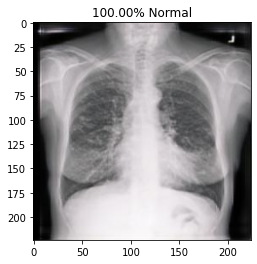

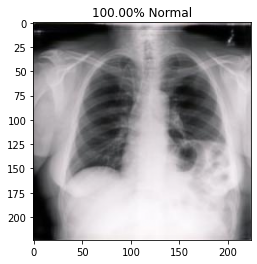

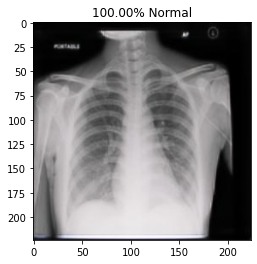

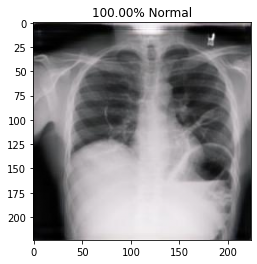

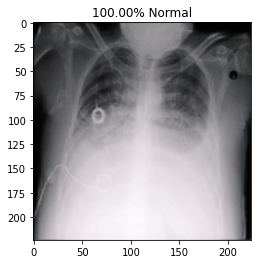

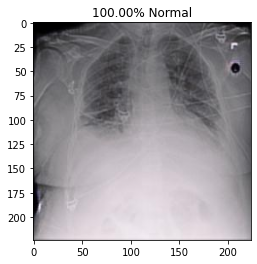

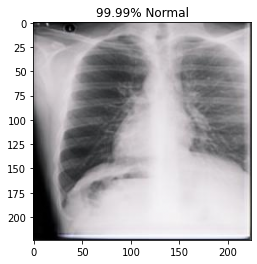

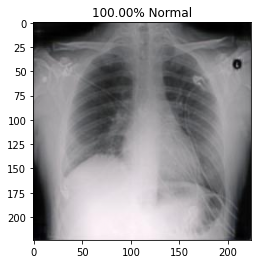

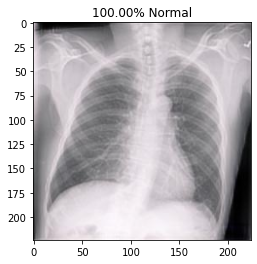

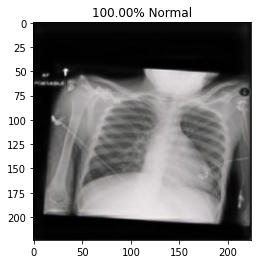

In [ ]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
    if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% Pneumonia')
    else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% Normal')
    plt.imshow(X_test[index])
    plt.show()

In [ ]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

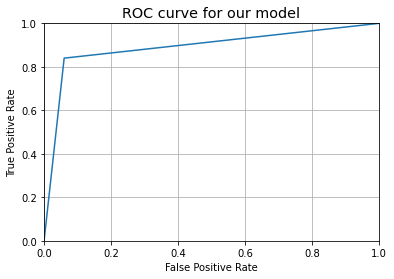

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

Confusion Matrix without Normalization


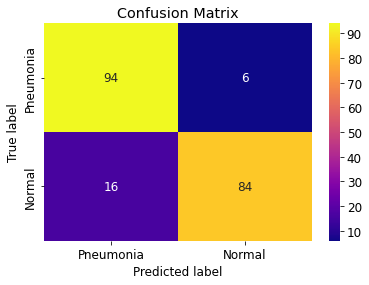

Confusion Matrix with Normalized Values


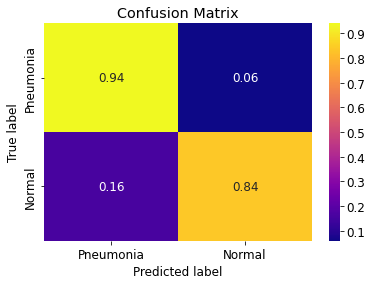

In [ ]:

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [ ]:
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90       100
           1       0.93      0.84      0.88       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



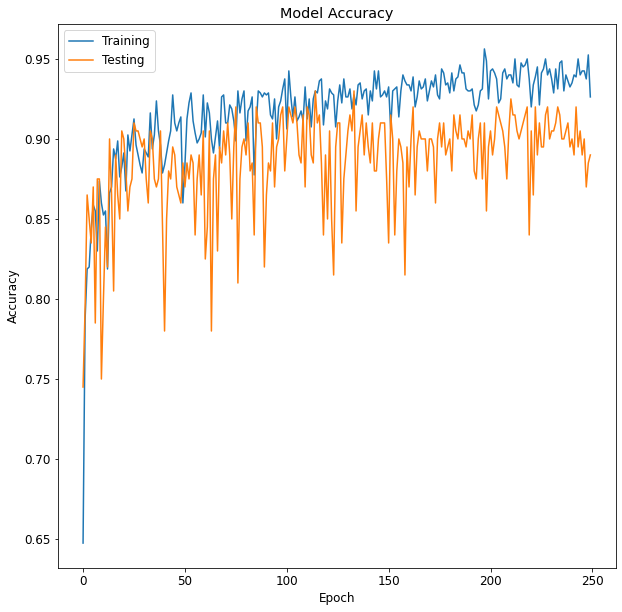

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('NASNetLarge_chest_accuracy.png')
plt.show()

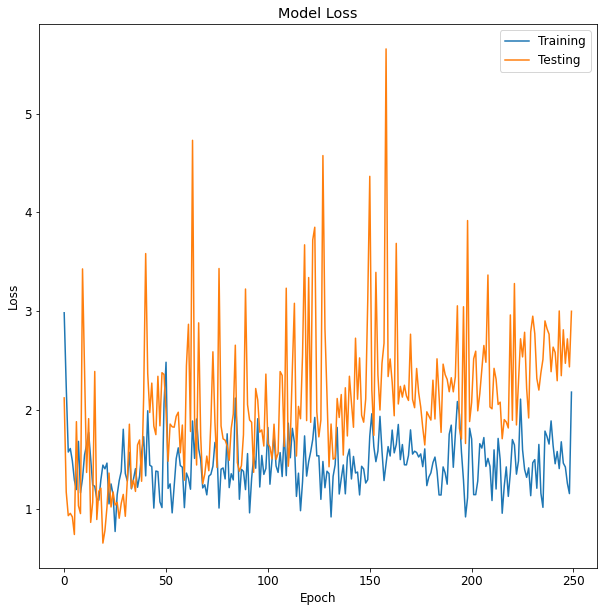

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('NASNetLarge_chest_loss.png')
plt.show()

#ResNet

In [ ]:
ResNet152V2Model = ResNet152V2(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = ResNet152V2Model.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

ResNet152V2_model = Model(inputs=ResNet152V2Model.input, outputs=outputs)

for layer in ResNet152V2Model.layers:
    layer.trainable = False

ResNet152V2_model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

234561536/234545216 [==============================] - 2s 0us/step


In [ ]:
ResNet152V2_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
history = ResNet152V2_model.fit(train_augmented.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / 32,
                    steps_per_epoch=len(X_train) / 32,
                    epochs=250)

Epoch 1/250
25/25 [==============================] - 41s 833ms/step - loss: 1.8695 - accuracy: 0.7138 - val_loss: 2.9384 - val_accuracy: 0.7100
Epoch 2/250
25/25 [==============================] - 17s 685ms/step - loss: 2.0820 - accuracy: 0.7837 - val_loss: 1.1882 - val_accuracy: 0.8400
Epoch 3/250
25/25 [==============================] - 17s 672ms/step - loss: 1.1640 - accuracy: 0.8500 - val_loss: 1.0596 - val_accuracy: 0.8500
Epoch 4/250
25/25 [==============================] - 17s 672ms/step - loss: 1.0719 - accuracy: 0.8525 - val_loss: 1.4867 - val_accuracy: 0.8550
Epoch 5/250
25/25 [==============================] - 17s 670ms/step - loss: 1.5344 - accuracy: 0.8413 - val_loss: 0.9045 - val_accuracy: 0.8750
Epoch 6/250
25/25 [==============================] - 17s 675ms/step - loss: 1.3754 - accuracy: 0.8637 - val_loss: 1.5224 - val_accuracy: 0.8350
Epoch 7/250
25/25 [==============================] - 17s 675ms/step - loss: 1.1654 - accuracy: 0.8763 - val_loss: 2.2139 - val_accuracy:

In [ ]:
ResNet152V2_model.save('/content/ResNet152V2_model_chest.h5')

In [ ]:
ResNet152V2_model.save_weights('/content/Pneumonia_ResNet152V2_model_chest_weights.hdf5')

In [ ]:
y_pred = ResNet152V2_model.predict(X_test, batch_size=batch_size)

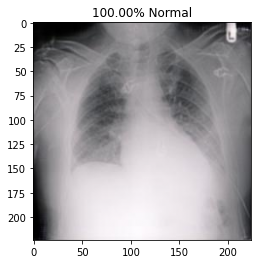

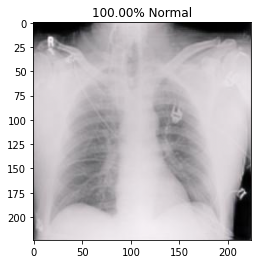

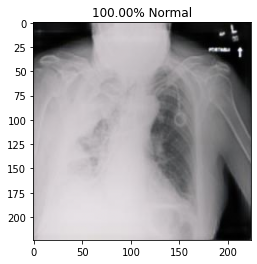

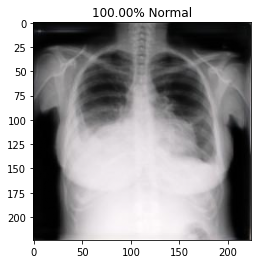

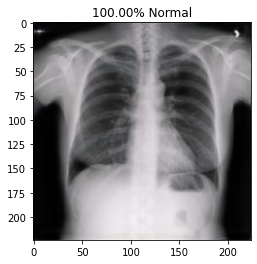

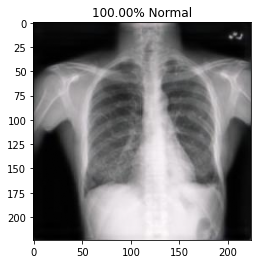

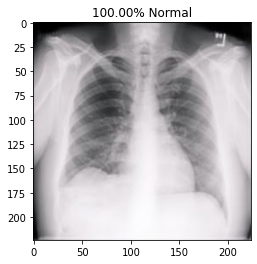

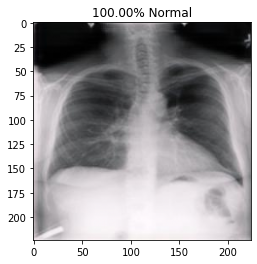

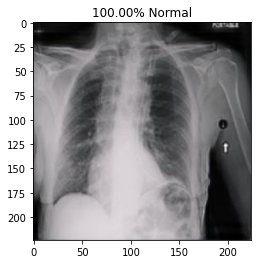

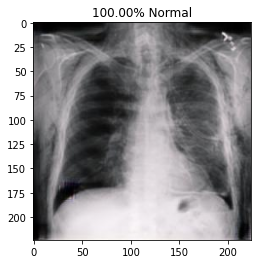

In [ ]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
    if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% Pneumonia')
    else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% Normal')
    plt.imshow(X_test[index])
    plt.show()

In [ ]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

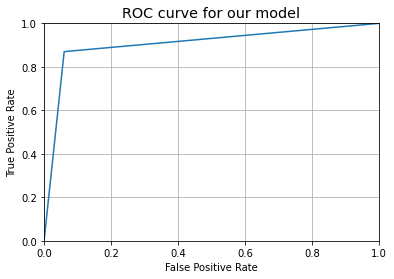

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

Confusion Matrix without Normalization


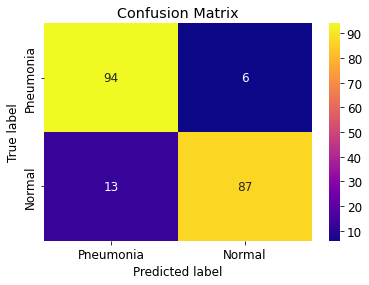

Confusion Matrix with Normalized Values


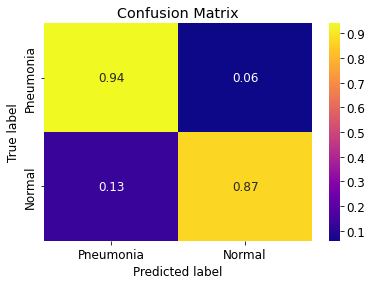

In [ ]:

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [ ]:
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       100
           1       0.94      0.87      0.90       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200



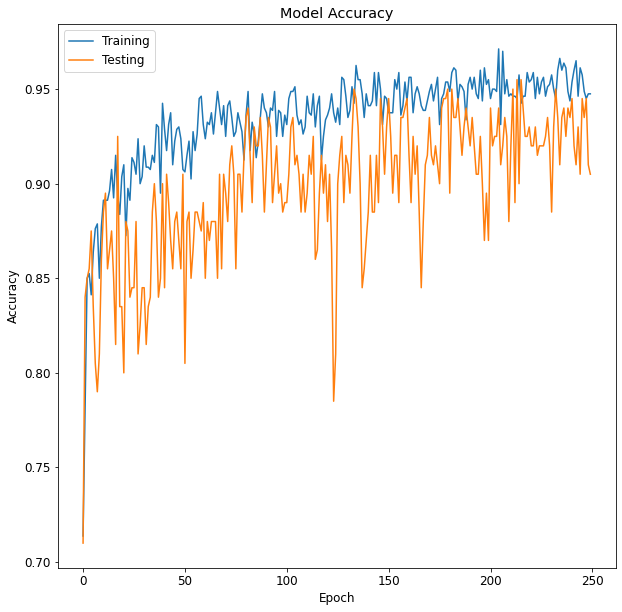

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('ResNet152V2_model_chest_accuracy.png')
plt.show()

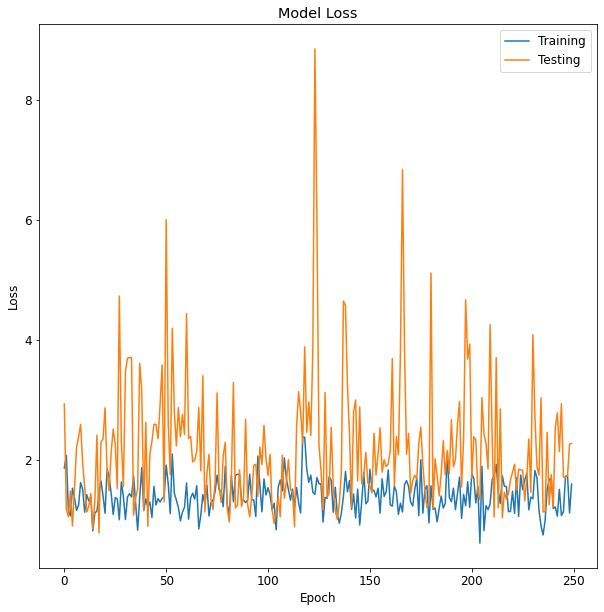

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('ResNet152V2_model_chest_loss.png')
plt.show()

InceptionResNetV2

In [ ]:
InceptionResNetV2Model = tf.keras.applications.InceptionResNetV2(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = InceptionResNetV2Model.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

InceptionResNetV2_model = Model(inputs=InceptionResNetV2Model.input, outputs=outputs)

for layer in InceptionResNetV2Model.layers:
    layer.trainable = False

InceptionResNetV2_model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

219070464/219055592 [==============================] - 2s 0us/step


In [ ]:
InceptionResNetV2_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
history = InceptionResNetV2_model.fit(train_augmented.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / 32,
                    steps_per_epoch=len(X_train) / 32,
                    epochs=250)

Epoch 1/250
25/25 [==============================] - 37s 821ms/step - loss: 4.8255 - accuracy: 0.5838 - val_loss: 1.9224 - val_accuracy: 0.7100
Epoch 2/250
25/25 [==============================] - 15s 607ms/step - loss: 1.3346 - accuracy: 0.7800 - val_loss: 1.1002 - val_accuracy: 0.7700
Epoch 3/250
25/25 [==============================] - 15s 612ms/step - loss: 1.1028 - accuracy: 0.7912 - val_loss: 1.0427 - val_accuracy: 0.7950
Epoch 4/250
25/25 [==============================] - 15s 610ms/step - loss: 0.9930 - accuracy: 0.7862 - val_loss: 0.6391 - val_accuracy: 0.8150
Epoch 5/250
25/25 [==============================] - 15s 610ms/step - loss: 1.1206 - accuracy: 0.7900 - val_loss: 1.1269 - val_accuracy: 0.7350
Epoch 6/250
25/25 [==============================] - 16s 630ms/step - loss: 1.2826 - accuracy: 0.7937 - val_loss: 0.8272 - val_accuracy: 0.8550
Epoch 7/250
25/25 [==============================] - 15s 610ms/step - loss: 0.9877 - accuracy: 0.8238 - val_loss: 0.7115 - val_accuracy:

In [ ]:
InceptionResNetV2_model.save('/content/InceptionResNetV2_model_chest.h5')

In [ ]:
InceptionResNetV2_model.save_weights('/content/Pneumonia_InceptionResNetV2_chest_weights.hdf5')


In [ ]:
y_pred = InceptionResNetV2_model.predict(X_test, batch_size=batch_size)


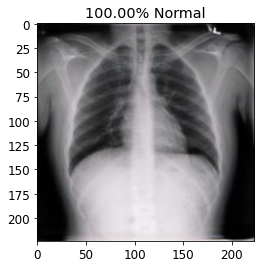

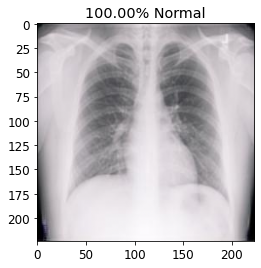

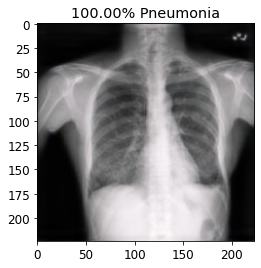

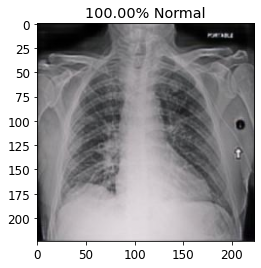

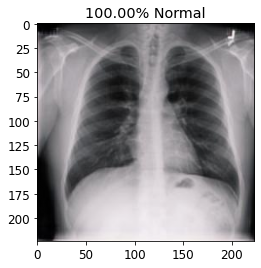

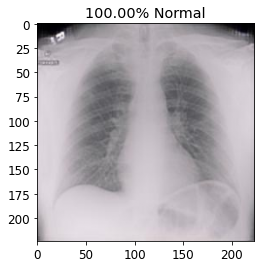

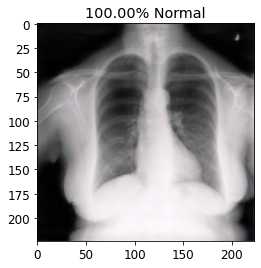

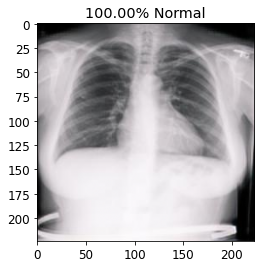

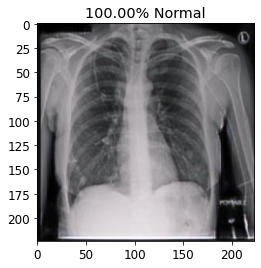

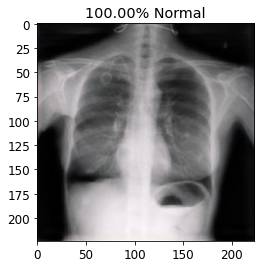

In [ ]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
    if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% Pneumonia')
    else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% Normal')
    plt.imshow(X_test[index])
    plt.show()

In [ ]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

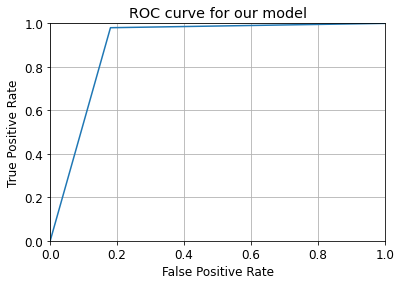

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

Confusion Matrix without Normalization


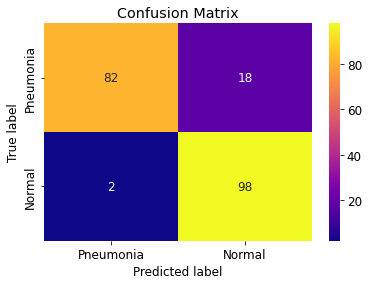

Confusion Matrix with Normalized Values


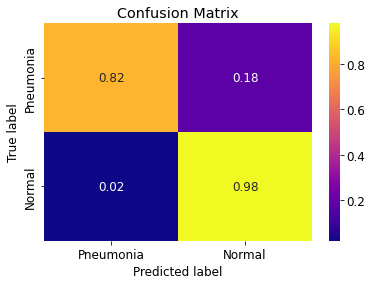

In [ ]:
print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [ ]:
print(classification_report(y_test_bin, y_pred_bin))


              precision    recall  f1-score   support

           0       0.98      0.82      0.89       100
           1       0.84      0.98      0.91       100

    accuracy                           0.90       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.90      0.90       200



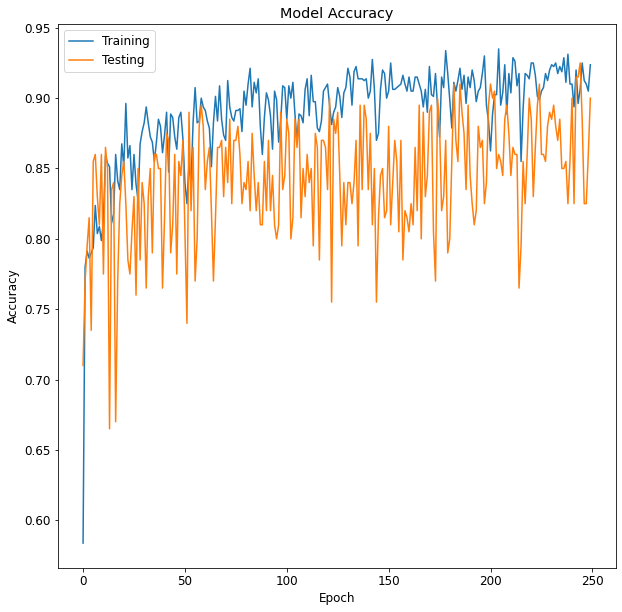

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('inceptionresnetv2_chest_accuracy.png')
plt.show()

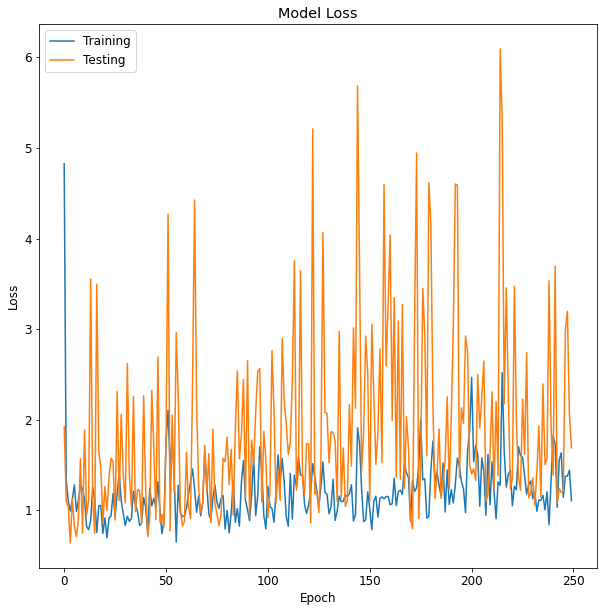

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('inceptionresnetv2_chest_loss.png')
plt.show()

VGG

In [ ]:
vggModel = VGG19(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = vggModel.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

vgg_model = Model(inputs=vggModel.input, outputs=outputs)

for layer in vggModel.layers:
    layer.trainable = False

vgg_model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
history = vgg_model.fit(train_augmented.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / 32,
                    steps_per_epoch=len(X_train) / 32,
                    epochs=250)

Epoch 1/250
25/25 [==============================] - 23s 633ms/step - loss: 1.1089 - accuracy: 0.6012 - val_loss: 0.8603 - val_accuracy: 0.6100
Epoch 2/250
25/25 [==============================] - 14s 565ms/step - loss: 0.6468 - accuracy: 0.7063 - val_loss: 0.4541 - val_accuracy: 0.7850
Epoch 3/250
25/25 [==============================] - 14s 565ms/step - loss: 0.5031 - accuracy: 0.7525 - val_loss: 0.4609 - val_accuracy: 0.8200
Epoch 4/250
25/25 [==============================] - 15s 566ms/step - loss: 0.4618 - accuracy: 0.7837 - val_loss: 0.4654 - val_accuracy: 0.8100
Epoch 5/250
25/25 [==============================] - 14s 571ms/step - loss: 0.4089 - accuracy: 0.8075 - val_loss: 0.4639 - val_accuracy: 0.8000
Epoch 6/250
25/25 [==============================] - 14s 568ms/step - loss: 0.4806 - accuracy: 0.7937 - val_loss: 0.5027 - val_accuracy: 0.7850
Epoch 7/250
25/25 [==============================] - 15s 584ms/step - loss: 0.3391 - accuracy: 0.8550 - val_loss: 0.2842 - val_accuracy:

In [ ]:
vgg_model.save('/content/vgg_model_chest.h5')

In [ ]:
vgg_model.save_weights('/content/Pneumonia_vgg_model_chest_weights.hdf5')

In [ ]:
vgg_model = load_model('/content/vgg_model_chest.h5')


Results and analysis


In [ ]:
y_pred = vgg_model.predict(X_test, batch_size=batch_size)


In [ ]:
y_pred[0:10]


array([[1.0000000e+00, 1.9048807e-10],
       [9.8268199e-01, 1.7317938e-02],
       [9.9998152e-01, 1.8479459e-05],
       [9.9999630e-01, 3.7292914e-06],
       [1.0000000e+00, 4.3489776e-10],
       [8.9533406e-01, 1.0466595e-01],
       [1.0000000e+00, 2.4667637e-10],
       [9.9952066e-01, 4.7936212e-04],
       [9.9995363e-01, 4.6365854e-05],
       [9.9997723e-01, 2.2811199e-05]], dtype=float32)

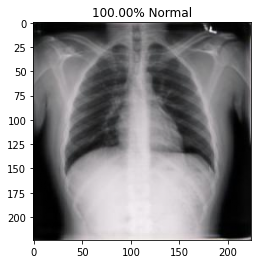

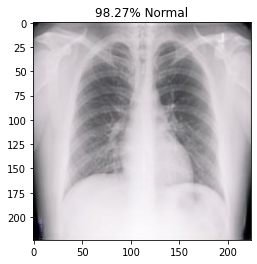

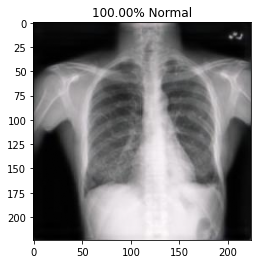

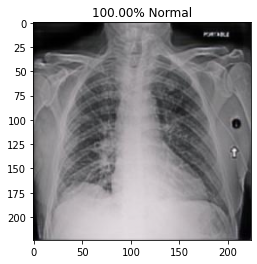

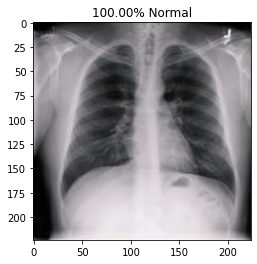

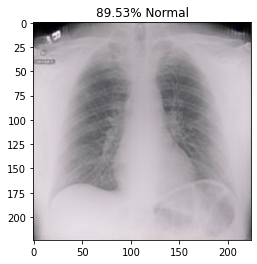

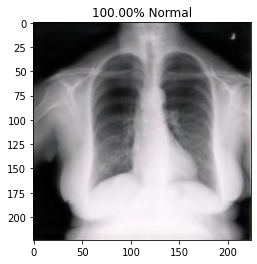

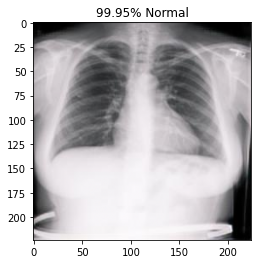

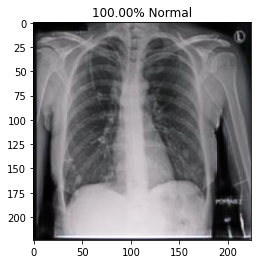

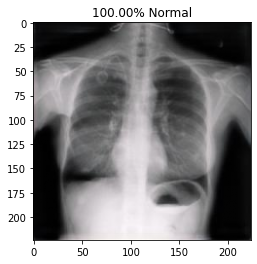

In [ ]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
    if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% Pneumonia')
    else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% Normal')
    plt.imshow(X_test[index])
    plt.show()

In [ ]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

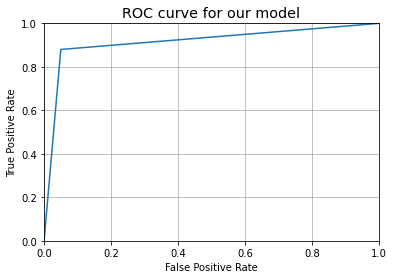

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

Confusion Matrix without Normalization


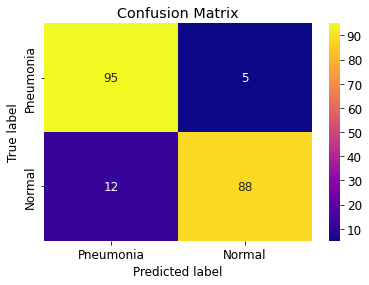

Confusion Matrix with Normalized Values


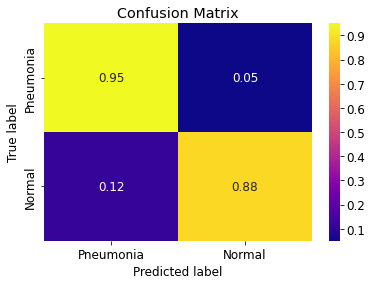

In [ ]:
print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [ ]:
print(classification_report(y_test_bin, y_pred_bin))


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       100
           1       0.95      0.88      0.91       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200



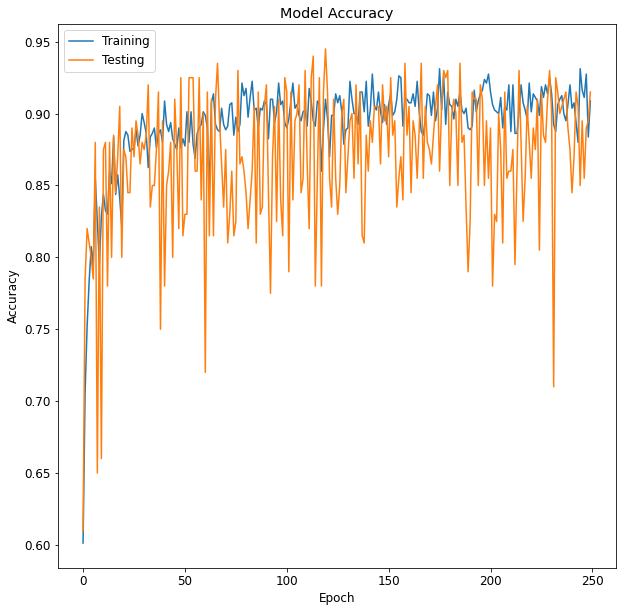

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('vgg_chest_accuracy.png')
plt.show()

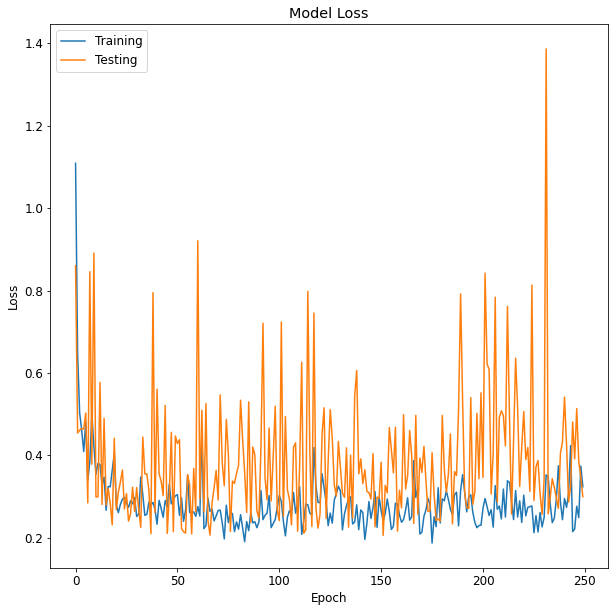

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('vgg_chest_loss.png')
plt.show()